In [1]:
import os
import numpy as np
import pandas as pd

from multiprocessing import freeze_support

Here, os will be used to manage the filesystem, numpy and pandas to manipulate and manage the data to be used, and multiprocessing.freeze_support to enable multiprocessing functionalities and run the twinning procedure in a faster, parallelized way.

In [ ]:
#pip install py-replay-bg
#pip install emcee

In [13]:
from py_replay_bg.py_replay_bg import ReplayBG
from py_replay_bg.visualizer import Visualizer
from py_replay_bg.analyzer import Analyzer

Here, ReplayBG is the core ReplayBG object, while Analyzer and Visualizer are utility objects that will be used to respectively analyze and visualize the results that we will produce with ReplayBG

Next steps consist of setting up some variables that will be used by ReplayBG environment. First of all, we will run the twinning procedure in a parallelized way so let's start with:

In [15]:
if __name__ == '__main__':
    freeze_support()

In [ ]:
# Set verbosity
    verbose = True
    plot_mode = False

Then, we need to decide what blueprint to use for twinning the data at hand. 'single-meal' or 'multi-meal'

In [17]:
    blueprint = 'multi-meal'
    save_folder = os.path.join(os.path.abspath(''),'..','..','..')
    parallelize = True

Now, let's load some data to play with. In this example, we will use the data stored in example/data/data_day_1.csv which contains a day of data of a patient with T1D:

In [29]:
#data = pd.read_csv(os.path.join(os.path.abspath(''), '..', 'data', 'data_day_1.csv'))
data = pd.read_csv('data_day_1.csv')
data.t = pd.to_datetime(data['t'])

Let's also load the patient information (i.e., body weight and basal insulin u2ss) stored in the example/data/patient_info.csv file.

In [33]:
#patient_info = pd.read_csv(os.path.join(os.path.abspath(''), '..', 'data', 'patient_info.csv'))
patient_info = pd.read_csv('patient_info.csv')
p = np.where(patient_info['patient'] == 1)[0][0]
# Set bw and u2ss
bw = float(patient_info.bw.values[p])
u2ss = float(patient_info.u2ss.values[p])

Finally, instantiate a ReplayBG object:

In [61]:
rbg = ReplayBG(blueprint=blueprint, save_folder=save_folder,
               yts=5, exercise=False,
               seed=1,
               verbose=True, plot_mode=False)


## Step 1: Creation of the digital twin

To create the digital twin, i.e., run the twinning procedure, using the MCMC method, use the rbg.twin() method:

In [41]:
rbg.twin(data=data, bw=bw, save_name='data_day_1',
         twinning_method='mcmc',
         parallelize=parallelize,
         n_steps=5000,
         u2ss=u2ss)

Creating the digital twin using MCMC
 - Running burn-in chain...


100%|█████████████████████████████████| 10000/10000 [1:01:55<00:00,  2.69it/s]


    - Mean acceptance fraction: 0.227


The chain is shorter than 50 times the integrated autocorrelation time for 10 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [620.63666697 204.86240906 598.49995292 807.79303224 554.25392253
 225.64342193 333.55433408 203.33432202  81.18507461 128.29345623
  85.51627556 117.60159363 287.11582689 568.4835403 ]


    - Mean auto correlation time: 344.055 steps
 - Running production chain...


100%|█████████████████████████████████████| 5000/5000 [39:51<00:00,  2.09it/s]


    - Mean acceptance fraction: 0.227


The chain is shorter than 50 times the integrated autocorrelation time for 14 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [112.1609363  119.07784409 118.30461179 128.39632361 123.13156929
 117.23837318 117.90203824 110.69360851 123.17373008 155.46558464
 122.57163801 127.7576113  122.33825718 121.76760862]


    - Mean auto correlation time: 122.856 steps


The chain is shorter than 50 times the integrated autocorrelation time for 14 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [112.1609363  119.07784409 118.30461179 128.39632361 123.13156929
 117.23837318 117.90203824 110.69360851 123.17373008 155.46558464
 122.57163801 127.7576113  122.33825718 121.76760862]


Extracting samples from posterior - 1000 realizations
Subsampling realizations...


## Step 2: Run replay simulations

Now that we have the digital twin created, it's time to replay using the rbg.replay() method.
The possibilities are several, but for now let's just see what happens if we run a replay using the same input data used for twinning:

In [55]:
replay_results = rbg.replay(data=data, bw=bw, save_name='data_day_1',
                            twinning_method='mcmc',
                            save_workspace=True,
                            save_suffix='_step_2a')

Running replay simulation
Loading twinned model parameter realizations...
Replaying scenario...


100%|█████████████████████████████████████| 1000/1000 [00:13<00:00, 71.95it/s]


Saving results in /Users/chinyere/Documents/GitHub/py_replay_bg/../../../results/workspaces/data_day_1_step_2a.pkl


It is possible to visualize the results of the simulation using:

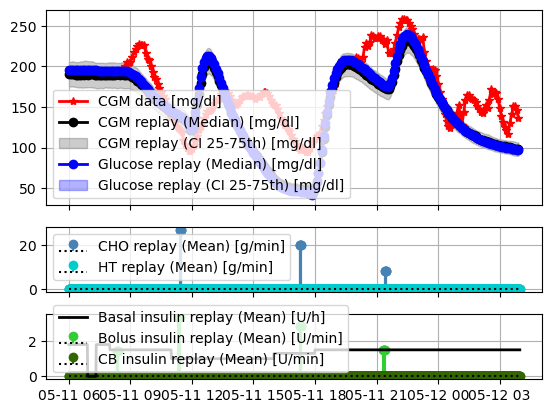

In [57]:
Visualizer.plot_replay_results(replay_results, data=data)

and analyzing the results using:

In [59]:
analysis = Analyzer.analyze_replay_results(replay_results, data=data)
print('Fit MARD: %.2f %%' % analysis['median']['twin']['mard'])
print('Mean glucose: %.2f mg/dl' % analysis['median']['glucose']['variability']['mean_glucose'])

Fit MARD: 23.36 %
Mean glucose: 149.99 mg/dl


As a second example, we can simulate what happens with different inputs, for example when we reduce insulin by 30%. To do that run:

In [63]:
data.bolus = data.bolus * .7
replay_results = rbg.replay(data=data, bw=bw, save_name=save_name,
                            twinning_method='mcmc',
                            save_workspace=True,
                            save_suffix='_step_2b')

# Visualize results
Visualizer.plot_replay_results(replay_results)
# Analyze results
analysis = Analyzer.analyze_replay_results(replay_results)

# Print, for example, the average glucose
print('Mean glucose: %.2f mg/dl' % analysis['median']['glucose']['variability']['mean_glucose'])

NameError: name 'save_name' is not defined